In [236]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [54]:
master_df = pd.read_csv('telecom_churn_data.csv')
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [55]:
master_df.shape

(99999, 226)

In [56]:
#storing the describe dataframe
master_desc_df=master_df.describe().transpose()
master_desc_df['null_perc']=100-(master_desc_df['count']*100/99999)
master_desc_df.head()

,count,mean,std,min,25%,50%,75%,max,null_perc
mobile_number,99999.0,7.001207e+09,695669.38629,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09,0.00000
circle_id,99999.0,1.090000e+02,0.00000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,0.00000
loc_og_t2o_mou,98981.0,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.01801
std_og_t2o_mou,98981.0,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.01801
loc_ic_t2o_mou,98981.0,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.01801


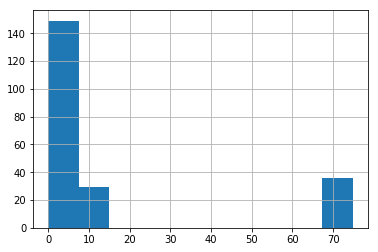

In [57]:
master_desc_df['null_perc'].hist()
plt.show()

# There are around 35-40 columns with >70% of rows null
# let us check the exact number of columns

In [58]:
# checking null values
master_desc_df.loc[master_desc_df['null_perc']>=73].count()

# There are 36 columns with more than 60% null values
# Let us check the range of null % for these columns

count        36
mean         36
std          36
min          36
25%          36
50%          36
75%          36
max          36
null_perc    36
dtype: int64

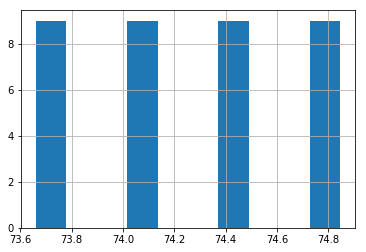

In [59]:
master_desc_df['null_perc'].loc[master_desc_df['null_perc']>=73].hist()
plt.show()

# Interestingly, there are four distinct values of null percentage for 9 each of these 36 columns
# let us check these columns in detail

In [60]:
master_desc_df.loc[master_desc_df['null_perc']>=73].sort_values(by='null_perc',ascending=False)
# The 9 columns are 9 different data points for each of the 4 months
# let us check if the same data points are missing across all 4 months

,count,mean,std,min,25%,50%,75%,max,null_perc
total_rech_data_6,25153.0,2.463802,2.789128,1.00,1.0,1.000,3.00,61.00,74.846748
count_rech_2g_6,25153.0,1.864668,2.570254,0.00,1.0,1.000,2.00,42.00,74.846748
av_rech_amt_data_6,25153.0,192.600982,192.646318,1.00,82.0,154.000,252.00,7546.00,74.846748
arpu_2g_6,25153.0,86.398003,172.767523,-35.83,0.0,10.830,122.07,6433.76,74.846748
count_rech_3g_6,25153.0,0.599133,1.274428,0.00,0.0,0.000,1.00,29.00,74.846748
night_pck_user_6,25153.0,0.025086,0.156391,0.00,0.0,0.000,0.00,1.00,74.846748
max_rech_data_6,25153.0,126.393392,108.477235,1.00,25.0,145.000,177.00,1555.00,74.846748
fb_user_6,25153.0,0.914404,0.279772,0.00,1.0,1.000,1.00,1.00,74.846748
arpu_3g_6,25153.0,89.555057,193.124653,-30.82,0.0,0.480,122.07,6362.28,74.846748
night_pck_user_7,25571.0,0.023034,0.150014,0.00,0.0,0.000,0.00,1.00,74.428744


In [61]:
null_perc_col_list = master_desc_df.loc[master_desc_df['null_perc']>=73].index.tolist()
null_perc_col_list = [x[:-2] for x in null_perc_col_list]
null_perc_col_set = set(null_perc_col_list)
len(null_perc_col_set)

# bingo! ... these are the same 9 columns across all 4 months, as no column exists twice for each month
# so, if we were to delete all 4 monthly instances of the column, we would not be causing any discrepancies in the data
# hence we can remove these 36 columns from consideration, as the percentage of missing values is quite high
# which in itself requires some formula etc.
# but let us still see if these can be imputed using other columns

9

In [62]:
null_perc_col_set

{'arpu_2g',
 'arpu_3g',
 'av_rech_amt_data',
 'count_rech_2g',
 'count_rech_3g',
 'fb_user',
 'max_rech_data',
 'night_pck_user',
 'total_rech_data'}

In [63]:
# count_rech 2g or 3g - there are other columns which give these values indirectly
# for example - av_rech_amt_data_6 and total_rech_data_6 can give us number of recharges done
# but it will not give us the number of 2g and 3g recharges individually
# so we can remove these two columns and replace them with (total_rech_data_x/av_rech_amt_data_x) for each month

# arpu_2g and arpu_3g - there is no way to compute this data from other data points such as total_rech_data or av_rech_amt_data
# as these data points themselves are highly null - and by the same logic, cannot be imputed

# night_pck_user cannot be determined from provided data, as usage data is not available - and these columns have no other links

# max_rech_data is also difficult to impute, as the recharge data is not available

# fb_user is also not linked to any other column, due to which imputing it is difficult

## hence, we will be dropping these 36 columns from the dataset later
# let us now check other columns with null values

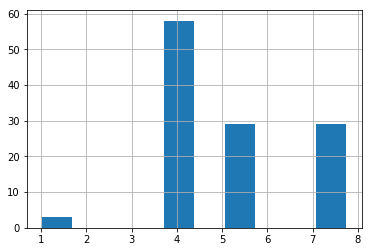

In [64]:
master_desc_df['null_perc'].loc[(master_desc_df['null_perc']>0) & (master_desc_df['null_perc']<73)].hist()
plt.show()

# for the remaining columns, the maximum null %age observed is <8
# for these, let us check the number of columns with same null-percentages

In [65]:
master_desc_df.loc[(master_desc_df['null_perc']>0) & (master_desc_df['null_perc']<73)].sort_values(by='null_perc',ascending=False)

# let us omit the bottom three columns before further analysis to check for similar data points being null across months

,count,mean,std,min,25%,50%,75%,max,null_perc
ic_others_9,92254.0,1.017162,12.381172,0.0,0.00,0.000,0.0000,1005.23,7.745077
std_og_t2m_mou_9,92254.0,86.276622,261.407396,0.0,0.00,2.500,48.5600,10223.43,7.745077
loc_og_t2m_mou_9,92254.0,90.463192,158.681454,0.0,8.81,39.120,106.8100,4429.88,7.745077
std_ic_t2f_mou_9,92254.0,2.173419,15.978601,0.0,0.00,0.000,0.0000,1431.96,7.745077
loc_og_t2f_mou_9,92254.0,3.655123,13.457549,0.0,0.00,0.000,1.9400,927.41,7.745077
loc_og_t2c_mou_9,92254.0,1.232726,5.619021,0.0,0.00,0.000,0.0000,339.84,7.745077
og_others_9,92254.0,0.047456,3.635466,0.0,0.00,0.000,0.0000,787.79,7.745077
loc_og_mou_9,92254.0,138.709970,245.934517,0.0,15.56,61.840,162.2250,11099.26,7.745077
std_ic_t2t_mou_9,92254.0,9.432479,53.376273,0.0,0.00,0.000,3.5100,3819.83,7.745077
std_og_t2t_mou_9,92254.0,82.342919,267.184991,0.0,0.00,0.000,28.2300,9382.58,7.745077


In [66]:
null_perc_col_list2 = master_desc_df.loc[(master_desc_df['null_perc']>2) & (master_desc_df['null_perc']<73)].index.tolist()
null_perc_col_list2 = [x[:-2] for x in null_perc_col_list2]
null_perc_col_set2 = set(null_perc_col_list2)
len(null_perc_col_set2)

# 119 - 3 = 116
# 116/4 = 29
# we got 29 columns as the result!
# this means that the same datapoints are missing across months
# let us check what these 29 columns are

29

In [67]:
null_perc_col_set2

{'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou'}

In [68]:
# As the percentage of null values are less, and as all these columns are about usage, we can impute numeric null values with 0
# before we start drops and imputations, let us also check the object columns
master_df.select_dtypes(include='object').describe().transpose()

# columns with only one unique value are not required - last_date_of_month_6,7,8,9
# the columns with 25-27% of values can be eliminated, as our cut off is 73%
# date of last recharge in each month can be used to extract more information
# specifically, we are interested in extracting the time gap between last recharge date and start of churn period (01/09/2014)
# but date of last recharge of data needs to be dropped, as around 75% of such data is null

,count,unique,top,freq
last_date_of_month_6,99999,1,6/30/2014,99999
last_date_of_month_7,99398,1,7/31/2014,99398
last_date_of_month_8,98899,1,8/31/2014,98899
last_date_of_month_9,98340,1,9/30/2014,98340
date_of_last_rech_6,98392,30,6/30/2014,16960
date_of_last_rech_7,98232,31,7/31/2014,17288
date_of_last_rech_8,96377,31,8/31/2014,14706
date_of_last_rech_9,95239,30,9/29/2014,22623
date_of_last_rech_data_6,25153,30,6/30/2014,1888
date_of_last_rech_data_7,25571,31,7/31/2014,1813


In [106]:
#creating a copy of the dataframe for filtering required rows and columns
filtered_df = master_df.copy()
filtered_df.shape

(99999, 226)

In [107]:
#calculating average recharge in first two months
filtered_df['av_rech_first_2_mnth'] = (filtered_df['total_rech_amt_6'] + filtered_df['total_rech_amt_7'])/2
filtered_df.shape

(99999, 227)

In [108]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 227 entries, mobile_number to av_rech_first_2_mnth
dtypes: float64(180), int64(35), object(12)
memory usage: 173.2+ MB


In [109]:
# Removing numeric columns with more than 73% null values
drop_cols = master_desc_df.loc[master_desc_df['null_perc']>=73].index.tolist()
filtered_df = filtered_df.drop(columns=drop_cols,axis=1)
filtered_df.shape

# 227 - 191 = 36 columns have been dropped

(99999, 191)

In [110]:
# removing object columns with only one unique value
drop_cols_2 = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
filtered_df = filtered_df.drop(columns=drop_cols_2,axis=1)
filtered_df.shape

# 191 - 187 = 4 columns dropped

(99999, 187)

In [111]:
# removing object columns with > 73% null values
drop_cols_3 = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
filtered_df = filtered_df.drop(columns=drop_cols_3,axis=1)
filtered_df.shape

# 187 - 183 = 4 more columns dropped

(99999, 183)

In [112]:
(filtered_df.isnull().sum()*100/len(filtered_df.index)).sort_values(ascending=False)

loc_ic_mou_9          7.745077
loc_ic_t2m_mou_9      7.745077
loc_ic_t2f_mou_9      7.745077
roam_og_mou_9         7.745077
std_ic_t2t_mou_9      7.745077
loc_og_t2t_mou_9      7.745077
std_ic_t2m_mou_9      7.745077
std_ic_t2f_mou_9      7.745077
loc_og_t2m_mou_9      7.745077
std_ic_t2o_mou_9      7.745077
std_ic_mou_9          7.745077
std_og_t2t_mou_9      7.745077
spl_ic_mou_9          7.745077
loc_og_t2f_mou_9      7.745077
isd_ic_mou_9          7.745077
loc_og_t2c_mou_9      7.745077
ic_others_9           7.745077
roam_ic_mou_9         7.745077
loc_og_mou_9          7.745077
spl_og_mou_9          7.745077
std_og_t2c_mou_9      7.745077
loc_ic_t2t_mou_9      7.745077
std_og_mou_9          7.745077
og_others_9           7.745077
onnet_mou_9           7.745077
std_og_t2m_mou_9      7.745077
std_og_t2f_mou_9      7.745077
offnet_mou_9          7.745077
isd_og_mou_9          7.745077
isd_ic_mou_8          5.378054
                        ...   
jul_vbc_3g            0.000000
jun_vbc_

In [113]:
numeric_cols = filtered_df.select_dtypes(exclude=['object']).columns
numeric_cols

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'av_rech_first_2_mnth'],
      dtype='object', length=179)

In [114]:
filtered_df[numeric_cols]=filtered_df[numeric_cols].fillna(0)
(filtered_df.isnull().sum()*100/len(filtered_df.index)).sort_values(ascending=False)

date_of_last_rech_9     4.760048
date_of_last_rech_8     3.622036
date_of_last_rech_7     1.767018
date_of_last_rech_6     1.607016
std_og_mou_7            0.000000
std_og_mou_6            0.000000
std_og_t2c_mou_9        0.000000
std_og_t2c_mou_8        0.000000
std_og_t2c_mou_7        0.000000
std_og_t2c_mou_6        0.000000
std_og_t2f_mou_9        0.000000
std_og_t2f_mou_8        0.000000
av_rech_first_2_mnth    0.000000
loc_og_mou_9            0.000000
std_og_t2f_mou_7        0.000000
std_og_t2f_mou_6        0.000000
std_og_t2m_mou_9        0.000000
std_og_t2m_mou_8        0.000000
std_og_t2m_mou_7        0.000000
std_og_t2m_mou_6        0.000000
std_og_t2t_mou_9        0.000000
std_og_t2t_mou_8        0.000000
std_og_t2t_mou_7        0.000000
std_og_mou_8            0.000000
std_og_mou_9            0.000000
isd_og_mou_6            0.000000
total_og_mou_6          0.000000
loc_ic_t2m_mou_7        0.000000
loc_ic_t2m_mou_6        0.000000
loc_ic_t2t_mou_9        0.000000
          

In [115]:
# Now we need to impute the missing values for date column
# As we would be deleting the column with _9 later, let us impute only the missing values only for the first three columns
# but we are specifically interested to create one column for date of last recharge by combining all three in the below manner
# if recharge date 8 is available then date_of_last_recharge is the date in 8
# if recharge date 8 is null but 7 is available then date_of_last_recharge is the date in 7
# if recharge date 7 is null but 6 is available then date_of_last_recharge is the date in 6
# if recharge date 6 is null then date_of_last_recharge is 20/05/2014 - to account (in some way, for an earlier recharge date)
# this is because we do not know when the customer was onboarded
from datetime import datetime
# let us create the logic for this
def last_recharge_date(date9,date8,date7,date6):
    #date_9 = datetime.strptime(date9,'%m/%d/%Y').date()
    #date_8 = datetime.strptime(date8,'%m/%d/%Y').date()
    #date_7 = datetime.strptime(date7,'%m/%d/%Y').date()
    #date_6 = datetime.strptime(date6,'%m/%d/%Y').date()

    if pd.isnull(date8):
        if pd.isnull(date7):
            if pd.isnull(date6):
                return('05/20/2014')
            else:
                return(date6)
        else:
            return(date7)
    else:
        return(date8)

filtered_df['date_of_last_recharge'] = filtered_df.apply(lambda x: last_recharge_date(x['date_of_last_rech_9'],
                                                                                      x['date_of_last_rech_8'],
                                                                                     x['date_of_last_rech_7'],
                                                                                     x['date_of_last_rech_6']), axis=1)
# filtered_df.loc[:,['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].describe()
filtered_df['date_of_last_recharge'].describe()

# Our logic worked!
# let us now use this column to compute the number of days between start of churn period and last recharge date

count         99999
unique           93
top       8/31/2014
freq          14706
Name: date_of_last_recharge, dtype: object

In [116]:
# creating the days_last_rech_from_churn_period column
filtered_df['start_churn_period']=datetime.strptime('09/01/2014','%m/%d/%Y').date()
filtered_df['date_of_last_recharge']=filtered_df['date_of_last_recharge'].apply(lambda x:datetime.strptime(x,'%m/%d/%Y').date())
filtered_df['days_last_rech_from_churn_period'] = filtered_df['start_churn_period'].sub(filtered_df['date_of_last_recharge'], axis=0)
filtered_df['days_last_rech_from_churn_period'].describe()

count                      99999
mean      8 days 03:50:15.498154
std      10 days 18:38:25.082442
min              1 days 00:00:00
25%              2 days 00:00:00
50%              5 days 00:00:00
75%              8 days 00:00:00
max            104 days 00:00:00
Name: days_last_rech_from_churn_period, dtype: object

In [117]:
# converting the difference to number
filtered_df['days_last_rech_from_churn_period'] = filtered_df['days_last_rech_from_churn_period'] / np.timedelta64(1, 'D')
filtered_df['days_last_rech_from_churn_period'].describe()

count    99999.000000
mean         8.159902
std         10.776679
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max        104.000000
Name: days_last_rech_from_churn_period, dtype: float64

In [118]:
# dropping all related columns that contributed to creating this derived column
days_last_rech_from_churn_period_cols = ['date_of_last_rech_9',
                                         'date_of_last_rech_8',
                                         'date_of_last_rech_7',
                                         'date_of_last_rech_6',
                                        'start_churn_period',
                                        'date_of_last_recharge']
filtered_df=filtered_df.drop(columns=days_last_rech_from_churn_period_cols,axis=1)
filtered_df.shape

(99999, 180)

In [119]:
# Finding out high value customers
filtered_df['av_rech_first_2_mnth'] = filtered_df['av_rech_first_2_mnth'].fillna(0)
hvcustomer_df = filtered_df[filtered_df['av_rech_first_2_mnth'] > np.percentile(filtered_df['av_rech_first_2_mnth'],70)]
hvcustomer_df.shape


(29979, 180)

In [120]:
#hvcustomer_df['total_ic_mou_9'] = hvcustomer_df['total_ic_mou_9'].fillna(0)
#hvcustomer_df['total_og_mou_9'] = hvcustomer_df['total_og_mou_9'].fillna(0)
#hvcustomer_df['vol_2g_mb_9'] = hvcustomer_df['vol_2g_mb_9'].fillna(0)
#hvcustomer_df['vol_3g_mb_9'] = hvcustomer_df['vol_3g_mb_9'].fillna(0)

# Defining Churn based on last month data

def defineChrun(row):
    if ((row['total_ic_mou_9'] + row['total_og_mou_9']<=0) and (row['vol_2g_mb_9']+row['vol_3g_mb_9']<=0)):
        return 1
    else:
        return 0

hvcustomer_df['Churn'] = hvcustomer_df.apply(defineChrun, axis=1)

hvcustomer_df['Churn'].value_counts()


0    27390
1     2589
Name: Churn, dtype: int64

In [121]:
# The churn rate is near to 9.5%
round((100*2589/27390),2)

9.45

In [122]:
# checking the hvcustomer_df['days_last_rech_from_churn_period'] column again
hvcustomer_df['days_last_rech_from_churn_period'].describe()

count    29979.000000
mean         5.879082
std          7.692669
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         86.000000
Name: days_last_rech_from_churn_period, dtype: float64

In [123]:
# checking how this varies with churn
hvcustomer_df.loc[:,['days_last_rech_from_churn_period','Churn']][hvcustomer_df['Churn']==0].describe()

,days_last_rech_from_churn_period,Churn
count,27390.000000,27390.0
mean,5.205915,0.0
std,6.251285,0.0
min,1.000000,0.0
25%,2.000000,0.0
50%,3.000000,0.0
75%,7.000000,0.0
max,86.000000,0.0


In [124]:
hvcustomer_df.loc[:,['days_last_rech_from_churn_period','Churn']][hvcustomer_df['Churn']==1].describe()

# So, for churners, avg days from start of churn period to date of last recharge is around 13 days
# but for non-churners this is around 5 days

,days_last_rech_from_churn_period,Churn
count,2589.000000,2589.0
mean,13.000772,1.0
std,14.709553,0.0
min,1.000000,1.0
25%,4.000000,1.0
50%,7.000000,1.0
75%,14.000000,1.0
max,85.000000,1.0


In [125]:
hvcustomer_df.shape

(29979, 181)

In [126]:
(hvcustomer_df.isnull().sum()*100/len(hvcustomer_df.index)).sort_values(ascending=False)

Churn               0.0
isd_og_mou_7        0.0
std_og_mou_9        0.0
std_og_mou_8        0.0
std_og_mou_7        0.0
std_og_mou_6        0.0
std_og_t2c_mou_9    0.0
std_og_t2c_mou_8    0.0
std_og_t2c_mou_7    0.0
std_og_t2c_mou_6    0.0
std_og_t2f_mou_9    0.0
std_og_t2f_mou_8    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_6    0.0
std_og_t2m_mou_9    0.0
std_og_t2m_mou_8    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_6    0.0
std_og_t2t_mou_9    0.0
std_og_t2t_mou_8    0.0
std_og_t2t_mou_7    0.0
isd_og_mou_6        0.0
isd_og_mou_8        0.0
loc_ic_t2f_mou_6    0.0
isd_og_mou_9        0.0
loc_ic_t2m_mou_8    0.0
loc_ic_t2m_mou_7    0.0
loc_ic_t2m_mou_6    0.0
loc_ic_t2t_mou_9    0.0
loc_ic_t2t_mou_8    0.0
                   ... 
std_ic_t2t_mou_7    0.0
std_ic_t2t_mou_6    0.0
loc_ic_mou_9        0.0
loc_ic_mou_8        0.0
loc_ic_mou_7        0.0
loc_ic_mou_6        0.0
loc_ic_t2f_mou_9    0.0
std_ic_t2o_mou_8    0.0
std_ic_t2o_mou_9    0.0
std_ic_mou_6        0.0
spl_ic_mou_9    

In [127]:
# removing the churn phase columns

# filtering the churn phase columns
churn_phase_cols = hvcustomer_df.loc[:,hvcustomer_df.columns.str.endswith("9")].columns.tolist()

# removing the columns
hvcustomer_df = hvcustomer_df.drop(columns=churn_phase_cols,axis=1)

# checking
hvcustomer_df.shape

#now only around 140 columns are left

(29979, 139)

In [128]:
# filtering the required names of datapoints across months
datapoints = [x[:-2] for x in churn_phase_cols]
datapoints = sorted(datapoints)
datapoints

# we cannot compute a direct sum of the below datapoints across four months
# date_of_last_rech, last_day_rch_amt, max_rech_amt
# so we will omit them from our loop of aggregated column creation

['arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_num',
 'vol_2g_mb',
 'vol_3g_mb']

In [129]:
# First iteration of of derived columns

for x in ['_6','_7','_8']:
    
    # 01. Total minutes of usage for each month
    # total_mou_x = onnet_mou_x + offnet_mou_x
    
    total_mou = 'total_mou'+x
    onnet_mou = 'onnet_mou'+x
    offnet_mou = 'offnet_mou'+x
    
    hvcustomer_df[total_mou]=hvcustomer_df[onnet_mou]+hvcustomer_df[offnet_mou]
    
    # 02. Total outgoing minutes of usage within operator for each month
    # total_og_t2t_mou_x = loc_og_t2t_mou_x + std_og_t2t_mou_x
    
    total_og_t2t_mou = 'total_og_t2t_mou'+x
    loc_og_t2t_mou = 'loc_og_t2t_mou'+x
    std_og_t2t_mou = 'std_og_t2t_mou'+x
    
    hvcustomer_df[total_og_t2t_mou]=hvcustomer_df[loc_og_t2t_mou]+hvcustomer_df[std_og_t2t_mou]
    
    # 03. Total incoming minutes of usage within operator for each month
    # total_ic_t2t_mou_x = loc_ic_t2t_mou_x + std_ic_t2t_mou_x
    
    total_ic_t2t_mou = 'total_ic_t2t_mou'+x
    loc_ic_t2t_mou = 'loc_ic_t2t_mou'+x
    std_ic_t2t_mou = 'std_ic_t2t_mou'+x
    
    hvcustomer_df[total_ic_t2t_mou]=hvcustomer_df[loc_ic_t2t_mou]+hvcustomer_df[std_ic_t2t_mou]
    
    # 04. Total voice calls minutes of usage within operator for each month
    # total_t2t_mou_x = total_og_t2t_mou_x + total_ic_t2t_mou_x
    
    total_t2t_mou = 'total_t2t_mou'+x
    total_og_t2t_mou = 'total_og_t2t_mou'+x
    total_ic_t2t_mou = 'total_ic_t2t_mou'+x
    
    hvcustomer_df[total_t2t_mou]=hvcustomer_df[total_og_t2t_mou]+hvcustomer_df[total_ic_t2t_mou]
    
    # 05. Total call center minutes of usage within operator for each month
    # total_og_t2c_mou_x = loc_og_t2c_mou_x + std_og_t2c_mou_x
    
    total_og_t2c_mou = 'total_og_t2c_mou'+x
    loc_og_t2c_mou = 'loc_og_t2c_mou'+x
    std_og_t2c_mou = 'std_og_t2c_mou'+x
    
    hvcustomer_df[total_og_t2c_mou]=hvcustomer_df[loc_og_t2c_mou]+hvcustomer_df[std_og_t2c_mou]
    
    # 06. Total outgoing minutes of usage to operator fixed line for each month
    # total_og_t2f_mou_x = loc_og_t2f_mou_x + std_og_t2f_mou_x
    
    total_og_t2f_mou = 'total_og_t2f_mou'+x
    loc_og_t2f_mou = 'loc_og_t2f_mou'+x
    std_og_t2f_mou = 'std_og_t2f_mou'+x
    
    hvcustomer_df[total_og_t2f_mou]=hvcustomer_df[loc_og_t2f_mou]+hvcustomer_df[std_og_t2f_mou]
    
    # 07. Total incoming minutes of usage from operator fixed line for each month
    # total_ic_t2f_mou_x = loc_ic_t2f_mou_x + std_ic_t2f_mou_x
    
    total_ic_t2f_mou = 'total_ic_t2f_mou'+x
    loc_ic_t2f_mou = 'loc_ic_t2f_mou'+x
    std_ic_t2f_mou = 'std_ic_t2f_mou'+x
    
    hvcustomer_df[total_ic_t2f_mou]=hvcustomer_df[loc_ic_t2f_mou]+hvcustomer_df[std_ic_t2f_mou]
    
    # 08. Total voice calls minutes of usage with operator fixed line for each month
    # total_t2f_mou_x = total_og_t2f_mou_x + total_ic_t2f_mou_x
    
    total_t2f_mou = 'total_t2f_mou'+x
    total_og_t2f_mou = 'total_og_t2f_mou'+x
    total_ic_t2f_mou = 'total_ic_t2f_mou'+x
    
    hvcustomer_df[total_t2f_mou]=hvcustomer_df[total_og_t2f_mou]+hvcustomer_df[total_ic_t2f_mou]
    
    # 09. Total outgoing minutes of usage with other operator's mobile for each month
    # total_og_t2m_mou_x = loc_og_t2m_mou_x + std_og_t2m_mou_x
    
    total_og_t2m_mou = 'total_og_t2m_mou'+x
    loc_og_t2m_mou = 'loc_og_t2m_mou'+x
    std_og_t2m_mou = 'std_og_t2m_mou'+x
    
    hvcustomer_df[total_og_t2m_mou]=hvcustomer_df[loc_og_t2m_mou]+hvcustomer_df[std_og_t2m_mou]
    
    # 10. Total incoming minutes of usage with other operator's mobile for each month
    # total_ic_t2m_mou_x = loc_ic_t2m_mou_x + std_ic_t2m_mou_x
    
    total_ic_t2m_mou = 'total_ic_t2m_mou'+x
    loc_ic_t2m_mou = 'loc_ic_t2m_mou'+x
    std_ic_t2m_mou = 'std_ic_t2m_mou'+x
    
    hvcustomer_df[total_ic_t2m_mou]=hvcustomer_df[loc_ic_t2m_mou]+hvcustomer_df[std_ic_t2m_mou]
    
    # 11. Total voice calls minutes of usage with other operator's mobile for each month
    # total_t2m_mou_x = total_og_t2m_mou_x + total_ic_t2m_mou_x
    
    total_t2m_mou = 'total_t2m_mou'+x
    total_og_t2m_mou = 'total_og_t2m_mou'+x
    total_ic_t2m_mou = 'total_ic_t2m_mou'+x
    
    hvcustomer_df[total_t2m_mou]=hvcustomer_df[total_og_t2m_mou]+hvcustomer_df[total_ic_t2m_mou]
     
    # 12. Total ISD minutes of usage for each month
    # isd_mou_x = isd_og_mou_x + isd_ic_mou_x
    
    isd_mou = 'isd_mou'+x
    isd_og_mou = 'isd_og_mou'+x
    isd_ic_mou = 'isd_ic_mou'+x
    
    hvcustomer_df[isd_mou]=hvcustomer_df[isd_og_mou]+hvcustomer_df[isd_ic_mou]
    
    # 13. Total roaming minutes of usage for each month
    # roam_mou_x = roam_og_mou_x + roam_ic_mou_x
    
    roam_mou = 'roam_mou'+x
    roam_og_mou = 'roam_og_mou'+x
    roam_ic_mou = 'roam_ic_mou'+x
    
    hvcustomer_df[roam_mou]=hvcustomer_df[roam_og_mou]+hvcustomer_df[roam_ic_mou]
    
    # 14. Total special minutes of usage for each month
    # spl_mou_x = spl_og_mou_x + spl_ic_mou_x
    
    spl_mou = 'spl_mou'+x
    spl_og_mou = 'spl_og_mou'+x
    spl_ic_mou = 'spl_ic_mou'+x
    
    hvcustomer_df[spl_mou]=hvcustomer_df[spl_og_mou]+hvcustomer_df[spl_ic_mou]
    
    # 15. Total Sachet usage per month
    # total_sachet_x = sachet_2g_x + sachet_3g_6
    
    total_sachet = 'total_sachet'+x
    sachet_2g = 'sachet_2g'+x
    sachet_3g = 'sachet_3g'+x
    
    hvcustomer_df[total_sachet]=hvcustomer_df[sachet_2g]+hvcustomer_df[sachet_3g]
    
    # 16. Total monthly usage per month
    # total_monthly_x = monthly_2g_x + monthly_3g_6

    total_monthly = 'total_monthly'+x
    monthly_2g = 'monthly_2g'+x
    monthly_3g = 'monthly_3g'+x
    
    hvcustomer_df[total_monthly]=hvcustomer_df[monthly_2g]+hvcustomer_df[monthly_3g]
    
hvcustomer_df.shape

(29979, 187)

In [130]:
# checking for columns available for the good phase - june and july
all_monthly_cols=hvcustomer_df.loc[:,hvcustomer_df.columns.str.endswith("_6")].columns.tolist()
all_monthly_cols=sorted(all_monthly_cols)
all_monthly_cols = [x[:-2] for x in all_monthly_cols]
all_monthly_cols

['arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_ic_t2f_mou',
 'total_ic_t2m_mou',
 'total_ic_t2t_mou',
 'total_monthly',
 'total_mou',
 'total_og_mou',
 'total_og_t2c_mou',
 'total_og_t2f_mou',
 'total_og_t2m_mou',
 'total_og_t2t_mou',
 'total_rech_amt',
 'total_rech_num',
 'total_sachet',
 'total_t2f_mou',
 'total_t2m_mou',
 'total_t2t_mou',
 'vol_2g_mb',
 'vol_3g_mb']

In [131]:
# creating the list of separately computed aggregates
datapoints2 = ['last_day_rch_amt', 'max_rech_amt']
for x in datapoints2:
    all_monthly_cols.remove(x)
len(all_monthly_cols)

56

In [132]:
# columns before aggregation
hvcustomer_df.shape

(29979, 187)

In [133]:
# Derived columns second iteration
# computing the aggregate columns for the available columns
for x in all_monthly_cols:
    jun=x+'_6'
    jul=x+'_7'
    aug=x+'_8'
    total='total_'+x
    hvcustomer_df[total]=hvcustomer_df[jun]+hvcustomer_df[jul]+hvcustomer_df[aug]
hvcustomer_df.shape

# created 40 new aggregate columns across the good and action phases

(29979, 243)

In [43]:
# Derived columns third iteration
# computing the average datapoints for the "good" phase - june and july
#for x in all_monthly_cols:
#    jun=x+'_6'
#    jul=x+'_7'
#    new_col='av_'+x+'_good'
#    hvcustomer_df[new_col]=(hvcustomer_df[jun]+hvcustomer_df[jul])/2
#hvcustomer_df.shape

In [134]:
# Derived columns fourth iteration
# aggregations for columns that do not have all monthly values

# Total outgoing minutes of usage with other operator's fixed line
# total_og_t2o_mou = loc_og_t2o_mou + std_og_t2o_mou

hvcustomer_df['total_og_t2o_mou']=hvcustomer_df['loc_og_t2o_mou']+hvcustomer_df['std_og_t2o_mou']

# Total incoming minutes of usage with other operator's fixed line
# total_ic_t2o_mou = loc_ic_t2o_mou + std_ic_t2o_mou_6,7,8,9

hvcustomer_df['total_ic_t2o_mou']=hvcustomer_df['loc_ic_t2o_mou']+hvcustomer_df['std_ic_t2o_mou_6']
+hvcustomer_df['std_ic_t2o_mou_7']+hvcustomer_df['std_ic_t2o_mou_8']

# Total voice calls minutes of usage with other operator's fixed line
# total_t2o_mou = total_og_t2o_mou + total_ic_t2o_mou

hvcustomer_df['total_t2o_mou']=hvcustomer_df['total_og_t2o_mou']+hvcustomer_df['total_ic_t2o_mou']


hvcustomer_df.shape

(29979, 246)

In [136]:
# Derived columns fifth iteration
# share of usage with external operators in total usage
hvcustomer_df.loc[:,['total_t2m_mou_6','total_t2m_mou_7','total_t2m_mou_8','total_t2o_mou']].describe()

# T2O total is zero
# so we can compute period total for T2M and find its share in total mou

,total_t2m_mou_6,total_t2m_mou_7,total_t2m_mou_8,total_t2o_mou
count,29979.000000,29979.000000,29979.000000,29979.0
mean,576.257373,589.185534,531.364335,0.0
std,568.615228,580.351537,576.614946,0.0
min,0.000000,0.000000,0.000000,0.0
25%,203.620000,213.595000,157.680000,0.0
50%,428.650000,437.930000,384.780000,0.0
75%,762.015000,776.815000,713.005000,0.0
max,8536.540000,9441.940000,14026.490000,0.0


In [139]:
# let us check all available t2o columns
hvcustomer_df.loc[:,['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']].describe()

# so it is not useful to include these columns in calculating total monthly voice call usages

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
count,29979.0,29979.0,29979.0,29979.0,29979.0,29979.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
# calculating monthly total voice call usages
hvcustomer_df['total_ic_og_mou_6']=hvcustomer_df['total_t2t_mou_6']+hvcustomer_df['total_og_t2c_mou_6']+hvcustomer_df['total_t2f_mou_6']+hvcustomer_df['total_t2m_mou_6']
hvcustomer_df['total_ic_og_mou_7']=hvcustomer_df['total_t2t_mou_7']+hvcustomer_df['total_og_t2c_mou_7']+hvcustomer_df['total_t2f_mou_7']+hvcustomer_df['total_t2m_mou_7']
hvcustomer_df['total_ic_og_mou_8']=hvcustomer_df['total_t2t_mou_8']+hvcustomer_df['total_og_t2c_mou_8']+hvcustomer_df['total_t2f_mou_8']+hvcustomer_df['total_t2m_mou_8']
hvcustomer_df.loc[:,['total_ic_og_mou_6','total_ic_og_mou_7','total_ic_og_mou_8']].describe()

,total_ic_og_mou_6,total_ic_og_mou_7,total_ic_og_mou_8
count,29979.000000,29979.000000,29979.000000
mean,974.933521,1002.782865,899.321583
std,784.175459,802.089549,815.463460
min,0.000000,0.000000,0.000000
25%,466.195000,489.665000,355.000000
50%,806.470000,830.940000,727.530000
75%,1274.015000,1305.035000,1213.195000
max,12309.760000,11166.080000,14077.950000


In [141]:
# function for dividing by total voice call usage
def div_by_zero(col1,col2):
    try:
        return(col1/col2)
    except ZeroDivisionError:
        return(0)

In [142]:
hvcustomer_df['t2m_share_6']=hvcustomer_df.apply(lambda x:div_by_zero(x['total_t2m_mou_6'],x['total_ic_og_mou_6']), axis=1)
hvcustomer_df['t2m_share_7']=hvcustomer_df.apply(lambda x:div_by_zero(x['total_t2m_mou_7'],x['total_ic_og_mou_7']), axis=1)
hvcustomer_df['t2m_share_8']=hvcustomer_df.apply(lambda x:div_by_zero(x['total_t2m_mou_8'],x['total_ic_og_mou_8']), axis=1)
hvcustomer_df.loc[:,['t2m_share_6','t2m_share_7','t2m_share_8']].describe()

,t2m_share_6,t2m_share_7,t2m_share_8
count,29123.000000,29208.000000,28075.000000
mean,0.606767,0.605839,0.610411
std,0.264142,0.263764,0.260354
min,0.000000,0.000000,0.000000
25%,0.412938,0.414442,0.431658
50%,0.660920,0.660001,0.664323
75%,0.822497,0.821779,0.821254
max,1.000000,1.000000,1.000000


In [149]:
hvcustomer_df.loc[:,['t2m_share_6','total_t2m_mou_6','total_ic_og_mou_6']][hvcustomer_df['t2m_share_6'].isnull()].describe()

# for all these cases, we can impute 0

,t2m_share_6,total_t2m_mou_6,total_ic_og_mou_6
count,0.0,856.0,856.0
mean,NaN,0.0,0.0
std,NaN,0.0,0.0
min,NaN,0.0,0.0
25%,NaN,0.0,0.0
50%,NaN,0.0,0.0
75%,NaN,0.0,0.0
max,NaN,0.0,0.0


In [150]:
# imputing derived columns with 0
hvcustomer_df.loc[:,['t2m_share_6','t2m_share_7','t2m_share_8']]=hvcustomer_df.loc[:,['t2m_share_6','t2m_share_7','t2m_share_8']].fillna(0)
hvcustomer_df.loc[:,['t2m_share_6','t2m_share_7','t2m_share_8']].describe()

,t2m_share_6,t2m_share_7,t2m_share_8
count,29979.000000,29979.000000,29979.000000
mean,0.589442,0.590258,0.571643
std,0.279270,0.277451,0.292645
min,0.000000,0.000000,0.000000
25%,0.383537,0.389214,0.357863
50%,0.650353,0.650960,0.639389
75%,0.818075,0.817819,0.811399
max,1.000000,1.000000,1.000000


In [153]:
# creating the share for good phase (june and july)
hvcustomer_df['total_ic_og_mou_good']=hvcustomer_df['total_ic_og_mou_6']+hvcustomer_df['total_ic_og_mou_7']
hvcustomer_df['total_t2m_mou_good']=hvcustomer_df['total_t2m_mou_6']+hvcustomer_df['total_t2m_mou_7']
hvcustomer_df['t2m_share_good']=hvcustomer_df.apply(lambda x:div_by_zero(x['total_t2m_mou_good'],x['total_ic_og_mou_good']), axis=1)
hvcustomer_df['t2m_share_good']=hvcustomer_df['t2m_share_good'].fillna(0)
hvcustomer_df['t2m_share_good'].describe()

count    29979.000000
mean         0.599491
std          0.263859
min          0.000000
25%          0.410312
50%          0.655629
75%          0.813106
max          1.000000
Name: t2m_share_good, dtype: float64

In [156]:
hvcustomer_df.loc[:,['t2m_share_good','t2m_share_6','t2m_share_7','t2m_share_8','Churn']][hvcustomer_df['Churn']==0].describe()

# for non-churners, the mean share of t2m is hovering around 60%

,t2m_share_good,t2m_share_6,t2m_share_7,t2m_share_8,Churn
count,27390.000000,27390.000000,27390.000000,27390.000000,27390.0
mean,0.604320,0.595187,0.599194,0.598734,0.0
std,0.258183,0.273275,0.268851,0.270164,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.422790,0.399008,0.408599,0.414715,0.0
50%,0.658469,0.655218,0.656760,0.657420,0.0
75%,0.811850,0.816844,0.817821,0.816833,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0


In [157]:
hvcustomer_df.loc[:,['t2m_share_good','t2m_share_6','t2m_share_7','t2m_share_8','Churn']][hvcustomer_df['Churn']==1].describe()

# in contrast to expectations, the share of t2m usage for churners is decreasing over time
# in any case, let us include these columns and check how they impact our models

,t2m_share_good,t2m_share_6,t2m_share_7,t2m_share_8,Churn
count,2589.000000,2589.000000,2589.000000,2589.000000,2589.0
mean,0.548406,0.528666,0.495715,0.285031,1.0
std,0.313282,0.330202,0.341968,0.360044,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.262220,0.220144,0.171807,0.000000,1.0
50%,0.602616,0.581979,0.526377,0.000000,1.0
75%,0.833718,0.834823,0.817227,0.628213,1.0
max,1.000000,1.000000,1.000000,1.000000,1.0


In [158]:
categorical_cols = hvcustomer_df.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [159]:
date_column_names = [x for x in hvcustomer_df.columns if 'date' in x]
date_column_names

[]

In [160]:
# cross check to verify there is no column related to month 9
mnth9_column_names = [x for x in hvcustomer_df.columns if '_9' in x]
mnth9_column_names

[]

In [161]:
# So finally there is no categorical columns left in the dataset and we can proceed with the PCA further.

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = hvcustomer_df.drop(['Churn','mobile_number'],axis=1)

# Putting response variable to y
y = hvcustomer_df['Churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int64

In [162]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = X.columns

X_train[cols] = scaler.fit_transform(X_train[cols])

X_train.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_t2o_mou,total_ic_og_mou_6,total_ic_og_mou_7,total_ic_og_mou_8,t2m_share_6,t2m_share_7,t2m_share_8,total_ic_og_mou_good,total_t2m_mou_good,t2m_share_good
88105,0.0,0.0,0.0,0.0,-1.276418,0.129817,0.873099,-0.644685,-0.524232,-0.463189,...,0.0,-1.244798,0.530325,1.921647,-2.112818,1.299189,1.354321,-0.385019,0.183913,1.330947
34588,0.0,0.0,0.0,0.0,-0.532197,-0.155187,-0.733325,-0.544468,-0.555446,-0.540589,...,0.0,-0.923285,-0.991137,-0.887076,0.165738,0.191770,0.914987,-1.058718,-0.830741,0.150517
16623,0.0,0.0,0.0,0.0,0.669662,-0.193021,-0.036721,-0.465636,-0.578691,-0.551898,...,0.0,-0.302778,-0.267202,-0.534294,0.533872,0.747204,0.788519,-0.314899,0.010139,0.642291
54904,0.0,0.0,0.0,0.0,-0.314969,0.199922,0.945057,-0.202151,-0.433204,-0.451363,...,0.0,-0.284314,0.779363,2.164783,-0.156224,0.982790,1.330924,0.279642,0.621865,0.617785
33555,0.0,0.0,0.0,0.0,-0.253807,-0.583049,-0.165798,-0.635502,-0.605319,-0.506014,...,0.0,0.275753,-0.267326,0.317425,1.425572,1.263583,1.330490,0.001612,0.721894,1.399925


In [164]:
X_train.shape

(20985, 253)

#### PCA and Classification Models

In [165]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [166]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [167]:
pca.components_

array([[-9.90674206e-17, -1.11022302e-16, -1.38777878e-17, ...,
         1.71445324e-01,  1.34163768e-01, -1.07375792e-03],
       [ 1.28902217e-17, -1.38777878e-17,  1.11022302e-16, ...,
        -1.65458860e-02,  4.43969200e-02,  7.88497874e-02],
       [ 3.96563022e-18, -2.08166817e-17,  5.55111512e-17, ...,
         1.70441594e-02, -1.39693762e-01, -1.87372679e-01],
       ...,
       [ 0.00000000e+00,  9.28186559e-17,  3.27624614e-18, ...,
         1.17260993e-16, -6.52509627e-17,  1.71938075e-19],
       [ 0.00000000e+00, -2.89542875e-17, -1.92680240e-16, ...,
        -8.73007599e-17,  8.66808525e-18,  1.10406619e-18],
       [ 0.00000000e+00, -1.42676600e-01,  8.47361597e-02, ...,
         5.09344409e-02,  3.57102503e-02, -1.24553146e-15]])

In [168]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-9.906742e-17,1.289022e-17,circle_id
1,-1.110223e-16,-1.387779e-17,loc_og_t2o_mou
2,-1.387779e-17,1.110223e-16,std_og_t2o_mou
3,3.469447e-18,5.551115e-17,loc_ic_t2o_mou
4,8.506436e-02,-7.096640e-04,arpu_6


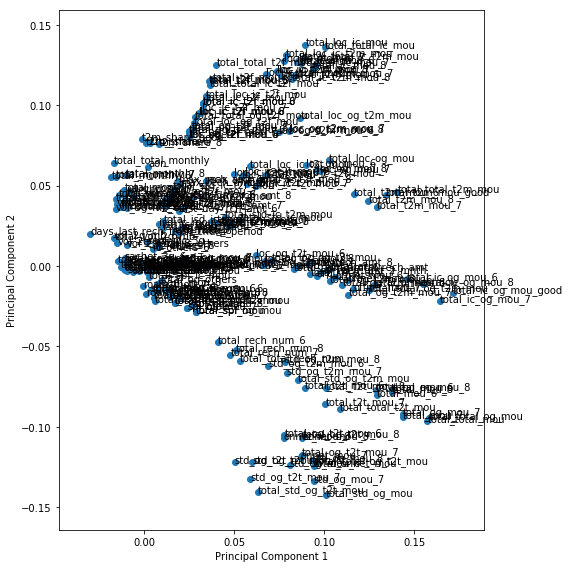

In [169]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

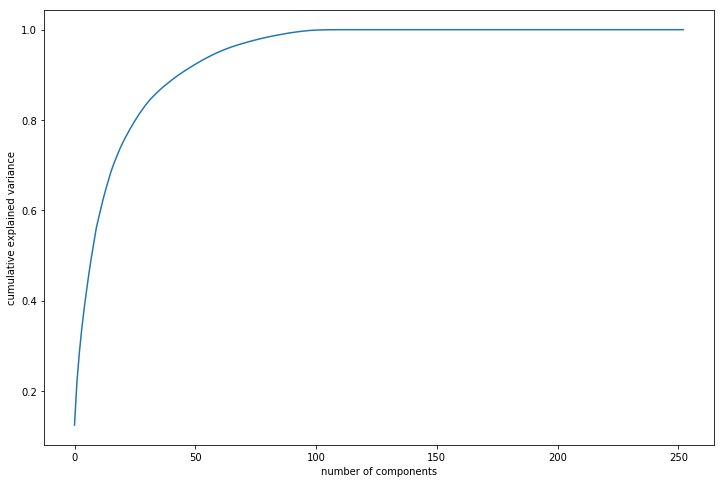

In [170]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [171]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=70)

In [172]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20985, 70)

In [173]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

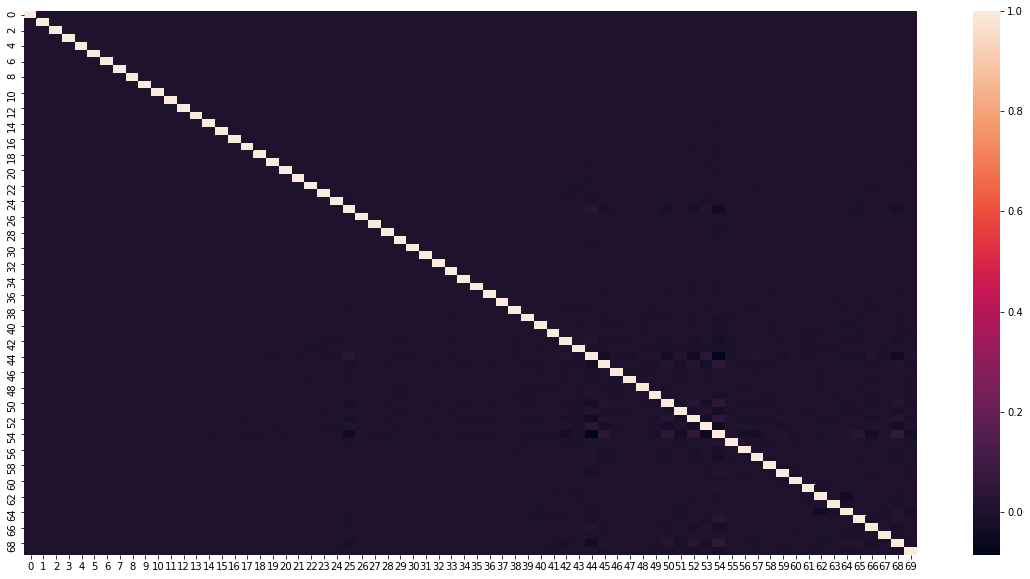

In [174]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = False)

- Proceeding with Logistic regression on PCA

In [175]:
# Logistic Regression on PCA

In [176]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [177]:
#Making prediction on the train data
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train))

'0.9'

In [178]:
pred_probs_train

array([0.01193745, 0.04420456, 0.00157511, ..., 0.01528731, 0.04995379,
       0.00952161])

In [179]:
# Framing the details for further analysis and optimization
prediction_df = pd.DataFrame({'Churn_Train':y_train.values, 'Churn_Train_Prob':pred_probs_train})
prediction_df['CustID'] = y_train.index
prediction_df.head()

,Churn_Train,Churn_Train_Prob,CustID
0,0,0.011937,88105
1,0,0.044205,34588
2,0,0.001575,16623
3,0,0.019026,54904
4,0,0.057256,33555


In [181]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    prediction_df[i]= prediction_df.Churn_Train_Prob.map(lambda x: 1 if x > i else 0)
prediction_df.head()

,Churn_Train,Churn_Train_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.011937,88105,1,0,0,0,0,0,0,0,0,0
1,0,0.044205,34588,1,0,0,0,0,0,0,0,0,0
2,0,0.001575,16623,1,0,0,0,0,0,0,0,0,0
3,0,0.019026,54904,1,0,0,0,0,0,0,0,0,0
4,0,0.057256,33555,1,0,0,0,0,0,0,0,0,0


In [182]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(prediction_df.Churn_Train, prediction_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.084537  1.000000  0.000000
0.1   0.1  0.855087  0.812852  0.858987
0.2   0.2  0.913939  0.695603  0.934100
0.3   0.3  0.930141  0.607666  0.959919
0.4   0.4  0.936621  0.523675  0.974754
0.5   0.5  0.934954  0.387260  0.985529
0.6   0.6  0.931237  0.271702  0.992140
0.7   0.7  0.927520  0.187711  0.995836
0.8   0.8  0.923469  0.111048  0.998490
0.9   0.9  0.919180  0.046787  0.999740


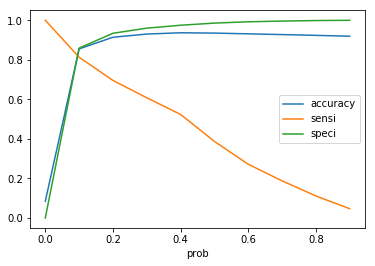

In [183]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [184]:
# code goes to find the optimum cutoff for the probability to define churn
prediction_df['Opt_predicted'] = prediction_df.Churn_Train_Prob.map(lambda x: 1 if x > 0.15 else 0)

metrics.accuracy_score(prediction_df.Churn_Train, prediction_df['Opt_predicted'])
confusion_metrics = metrics.confusion_matrix(prediction_df.Churn_Train, prediction_df['Opt_predicted'])
print(confusion_metrics[1,0])

448


In [185]:
TP = confusion_metrics[1,1]
FN = confusion_metrics[1,0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.7474633596392334


In [186]:
metrics.accuracy_score(prediction_df.Churn_Train, prediction_df.Opt_predicted)

0.8963068858708602

In [187]:
#Applying selected components to the test data - 16 components
X_test[cols] = scaler.transform(X_test[cols])
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 70)

In [188]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.9'

In [189]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(prediction_df.Churn_Train, prediction_df.Churn_Train_Prob)

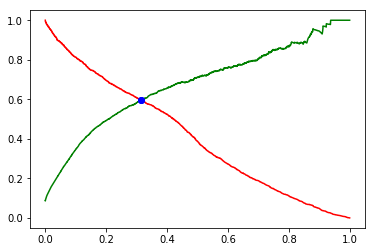

[0.31267697 0.31313806] [0.5971831  0.59751973] [0.59751973 0.59751973]


In [191]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

#checking where precision and recall are changing direction

idx = np.argwhere(np.diff(np.sign(p - r))).flatten()

#Plotting the point of intersection of precision and recall

plt.plot(thresholds[idx], p[idx], 'bo')

plt.show()

#Printing the value of the threshold for which precision and recall are intersecting

print(thresholds[idx],p[idx],r[idx])

In [192]:
prediction_df['0.32_predicted'] = prediction_df.Churn_Train_Prob.map(lambda x: 1 if x > 0.32 else 0)

metrics.accuracy_score(prediction_df.Churn_Train, prediction_df['0.32_predicted'])
confusion_metrics = metrics.confusion_matrix(prediction_df.Churn_Train, prediction_df['0.32_predicted'])
print(confusion_metrics[1,0])

722


In [193]:
TP = confusion_metrics[1,1]
FN = confusion_metrics[1,0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.593010146561443


In [195]:
metrics.accuracy_score(prediction_df.Churn_Train, prediction_df['0.32_predicted'])

0.9323326185370503

In [196]:
pred_probs_test

array([5.13618373e-05, 6.32068038e-03, 1.32662297e-02, ...,
       2.24702439e-02, 5.33892273e-05, 1.02184603e-02])

In [197]:
predictiontest_df = pd.DataFrame({'Churn_Test':y_test.values, 'Churn_Test_Prob':pred_probs_test})
predictiontest_df['CustID'] = y_test.index
predictiontest_df.head()

,Churn_Test,Churn_Test_Prob,CustID
0,0,0.000051,76438
1,0,0.006321,72869
2,0,0.013266,86053
3,0,0.048410,29093
4,0,0.459184,96385


In [206]:
predictiontest_df['0.32_predicted'] = predictiontest_df.Churn_Test_Prob.map(lambda x: 1 if x > 0.32 else 0)

metrics.accuracy_score(predictiontest_df.Churn_Test, predictiontest_df['0.32_predicted'])
confusion_metrics = metrics.confusion_matrix(predictiontest_df.Churn_Test, predictiontest_df['0.32_predicted'])
print(confusion_metrics[1,0])

357


In [207]:
TP = confusion_metrics[1,1]
FN = confusion_metrics[1,0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.561963190184049


In [208]:
metrics.accuracy_score(predictiontest_df.Churn_Test, predictiontest_df['0.35_predicted'])

0.9271736713364466

In [209]:
predictiontest_df.head()

,Churn_Test,Churn_Test_Prob,CustID,0.35_predicted,0.32_predicted
0,0,0.000051,76438,0,0
1,0,0.006321,72869,0,0
2,0,0.013266,86053,0,0
3,0,0.048410,29093,0,0
4,0,0.459184,96385,1,1


In [210]:
## For the total prediction data we need to merge both the training and test data frame

In [211]:
prediction_df.head()

,Churn_Train,Churn_Train_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Opt_predicted,0.32_predicted
0,0,0.011937,88105,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.044205,34588,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.001575,16623,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.019026,54904,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.057256,33555,1,0,0,0,0,0,0,0,0,0,0,0


In [212]:
pd.crosstab(predictiontest_df['Churn_Test'],predictiontest_df['0.32_predicted'])

0.32_predicted,0,1
Churn_Test,,
0,7866,313
1,357,458


In [213]:
# what this means is that 458 churners are rightly identified but 357 are not
# total churners are 815 - a sensitivity of 56%
# we are un-concerned with efforts towards the 313 false positives, as these customers will not churn
# So, we can improve sensitivity at the expense of specificity by decreasing the cut-off for predicting churn
# let us lower the cutoff now and check what happens

predictiontest_df['0.25_predicted'] = predictiontest_df.Churn_Test_Prob.map(lambda x: 1 if x > 0.25 else 0)
pd.crosstab(predictiontest_df['Churn_Test'],predictiontest_df['0.25_predicted'])

# total churners are still 815, and more churners are being rightly identified - form 458 to 508
# so the sensitivity is now 508 / (815) = 62.3%
# let us lower the cutoff further and check what happens

0.25_predicted,0,1
Churn_Test,,
0,7743,436
1,307,508


In [214]:
predictiontest_df['0.15_predicted'] = predictiontest_df.Churn_Test_Prob.map(lambda x: 1 if x > 0.15 else 0)
pd.crosstab(predictiontest_df['Churn_Test'],predictiontest_df['0.15_predicted'])

# total churners are still 815, and more churners are being rightly identified - form 508 to 593
# so the sensitivity is now 593 / (815) = 73%

0.15_predicted,0,1
Churn_Test,,
0,7411,768
1,222,593


In [215]:
# Let us check these for training dataset as well
prediction_df['0.32_predicted'] = prediction_df.Churn_Train_Prob.map(lambda x: 1 if x > 0.32 else 0)
prediction_df['0.25_predicted'] = prediction_df.Churn_Train_Prob.map(lambda x: 1 if x > 0.25 else 0)
prediction_df['0.15_predicted'] = prediction_df.Churn_Train_Prob.map(lambda x: 1 if x > 0.15 else 0)


In [216]:
pd.crosstab(prediction_df['Churn_Train'],prediction_df['0.32_predicted'])
# sensitivity = 1052 /(1774) = 59.3%

0.32_predicted,0,1
Churn_Train,,
0,18513,698
1,722,1052


In [217]:
pd.crosstab(prediction_df['Churn_Train'],prediction_df['0.25_predicted'])
# sensitivity = 1153 /(1774) = 65%

0.25_predicted,0,1
Churn_Train,,
0,18240,971
1,621,1153


In [218]:
pd.crosstab(prediction_df['Churn_Train'],prediction_df['0.15_predicted'])
# sensitivity = 1326 /(1774) = 75%

0.15_predicted,0,1
Churn_Train,,
0,17483,1728
1,448,1326


### Logistic Regression - Conclusion 
#### Although sensitivity can be increased by varying the cut-off
#### it results in sub-optimal classification
- say marketing campaigns are constructed to target users predicted to churn, then the spend on these campaigns would be misdirected with increasing proportion as the cut-off keeps reducing
    - at the cut-off of 0.35, the campaigns would target 684 false churners instead of the required 790 churners
    - at the cut-off of 0.25, the campaigns would target 1103 false churners instead of the required 580 churners
    - at the cut-off of 0.15, the campaigns would target 1982 false churners instead of the required 403 churners

#### The better solution would be to build a model that provides better sensitivity

## Optimal result of logistic regression and PCA - sensitivity on test data is 508 / (815) = 62.3%

#### We will now check if XGBoost on PCA can provide us with a better model

In [219]:
# XGboost on PCA

In [220]:
import xgboost as xgb
from xgboost import XGBClassifier

# fit model on training data with default hyperparameters - learning rate 0.1 and subsample 1.0
model = XGBClassifier()
model.fit(df_train_pca, y_train)

# make prediction on train data
y_train_prob = model.predict_proba(df_train_pca)[:,1]

# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(df_test_pca)[:,1]
y_pred[:10]

array([0.00414813, 0.00807153, 0.02458113, 0.01876182, 0.19566716,
       0.07078855, 0.04291414, 0.23203667, 0.0245636 , 0.02149571],
      dtype=float32)

In [221]:
y_train_prob

array([0.02765005, 0.031196  , 0.00602516, ..., 0.02554664, 0.07401184,
       0.01139686], dtype=float32)

In [222]:
prediction1_df = pd.DataFrame({'Churn_Train':y_train.values, 'Churn_Train_Prob':y_train_prob})
prediction1_df['CustID'] = y_train.index
prediction1_df.head()

,Churn_Train,Churn_Train_Prob,CustID
0,0,0.027650,88105
1,0,0.031196,34588
2,0,0.006025,16623
3,0,0.033736,54904
4,0,0.026287,33555


In [223]:
p, r, thresholds = precision_recall_curve(prediction1_df.Churn_Train, prediction1_df.Churn_Train_Prob)

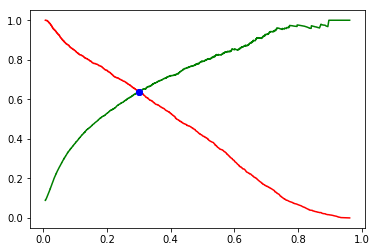

[0.3015979 0.3016326] [0.63943662 0.63923337] [0.63979707 0.63923337]


In [224]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

#checking where precision and recall are changing direction

idx = np.argwhere(np.diff(np.sign(p - r))).flatten()

#Plotting the point of intersection of precision and recall

plt.plot(thresholds[idx], p[idx], 'bo')

plt.show()

#Printing the value of the threshold for which precision and recall are intersecting

print(thresholds[idx],p[idx],r[idx])

In [225]:
prediction1_df['0.30_predicted'] = prediction1_df.Churn_Train_Prob.map(lambda x: 1 if x > 0.30 else 0)

metrics.accuracy_score(prediction1_df.Churn_Train, prediction1_df['0.30_predicted'])
confusion_metrics = metrics.confusion_matrix(prediction1_df.Churn_Train, prediction1_df['0.30_predicted'])
print(confusion_metrics[1,0])

635


In [226]:
TP = confusion_metrics[1,1]
FN = confusion_metrics[1,0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.6420518602029313


In [228]:
metrics.accuracy_score(prediction1_df.Churn_Train, prediction1_df['0.30_predicted'])

0.9388134381701215

In [229]:
prediction1_test_df = pd.DataFrame({'Churn_Test':y_test.values, 'Churn_Test_Prob':y_pred})
prediction1_test_df['CustID'] = y_test.index
prediction1_test_df.head()

,Churn_Test,Churn_Test_Prob,CustID
0,0,0.004148,76438
1,0,0.008072,72869
2,0,0.024581,86053
3,0,0.018762,29093
4,0,0.195667,96385


In [230]:
prediction1_test_df['0.30_predicted'] = prediction1_test_df.Churn_Test_Prob.map(lambda x: 1 if x > 0.30 else 0)

metrics.accuracy_score(prediction1_test_df.Churn_Test, prediction1_test_df['0.30_predicted'])

0.9236157438292195

In [231]:
confusion_metrics = metrics.confusion_matrix(prediction1_test_df.Churn_Test, prediction1_test_df['0.30_predicted'])
print(confusion_metrics[1,0])

366


In [232]:
TP = confusion_metrics[1,1]
FN = confusion_metrics[1,0]
sensitivity = TP/(TP+FN)
print(sensitivity)

0.550920245398773


In [233]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 90.89%


## Optimal result of XGBoost and PCA - sensitivity of 55% on test data

#### XGBoost hyperparameter tuning

In [280]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.35,0.6], 
             'subsample': [0.3, 0.6, 0.9]}         


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        cv = folds, 
                        verbose = 1,
                        scoring="recall",
                        return_train_score=True,
                       n_jobs=-1)

In [281]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 10.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.35, 0.6], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [297]:
# extracting best cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
best_params_index_list = cv_results.loc[cv_results['rank_test_score']==1].index.tolist()
best_params_index=best_params_index_list[0]
best_lr = cv_results.iloc[best_params_index]['param_learning_rate']
best_ss = cv_results.iloc[best_params_index]['param_subsample']

In [299]:
cv_results.loc[:,['param_learning_rate','param_subsample']][cv_results['rank_test_score']==1]

,param_learning_rate,param_subsample
5,0.35,0.9


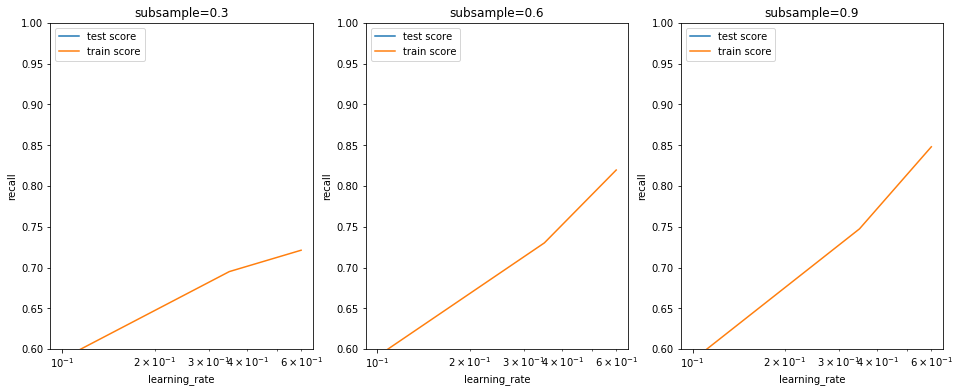

In [298]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1,0.35,0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('recall')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.9 and learning_rate of about 0.35 seems optimal.


Let's build a final model with the chosen hyperparameters.

In [302]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for binary classification
params = {'learning_rate': 0.35,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.35, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.9, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [303]:
# make predictions for train data
# we will first use predict_proba since we need probabilities to compute auc
y_train_pred = model.predict_proba(X_train)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred)
auc

# The auc is quite good. let us check the cut-off using the training data

0.9648404207778132

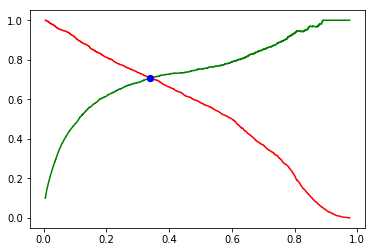

[0.33922774 0.33932012] [0.70760563 0.70744081] [0.70800451 0.70744081]


In [304]:
p, r, thresholds = precision_recall_curve(y_train,y_train_pred)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

#checking where precision and recall are changing direction

idx = np.argwhere(np.diff(np.sign(p - r))).flatten()

#Plotting the point of intersection of precision and recall

plt.plot(thresholds[idx], p[idx], 'bo')

plt.show()

#Printing the value of the threshold for which precision and recall are intersecting

print(thresholds[idx],p[idx],r[idx])

# 0.34 seems to be the ideal cut-off

In [305]:
best_xgb_model_train_res = y_train.to_frame()
best_xgb_model_train_res['pred_churn']=y_train_pred
best_xgb_model_train_res['0.34_predicted'] = best_xgb_model_train_res.pred_churn.map(lambda x: 1 if x > 0.34 else 0)
pd.crosstab(best_xgb_model_train_res['Churn'],best_xgb_model_train_res['0.34_predicted'])

# 0.34 as cut-off results in the following metrics
# accuracy - 19948 / 20985 = 95%
# sensitivity - 1256 / 1774 = 71%
# specificity - 18694 / 19211 = 97%

# this is by far the highest value of sensitivity we have been able to achieve so far
# let us now check the test result metrics with the same cut-off

0.34_predicted,0,1
Churn,,
0,18694,517
1,520,1254


In [308]:
# make predictions for test data
# first, we use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.949888424417763

We're looking at an AUC of 0.95 .. Let us now check the metrics for this model with 0.34 as cut-off

In [309]:
best_xgb_model_test_res = y_test.to_frame()
best_xgb_model_test_res['pred_churn']=y_pred
best_xgb_model_test_res['0.34_predicted'] = best_xgb_model_test_res.pred_churn.map(lambda x: 1 if x > 0.34 else 0)
pd.crosstab(best_xgb_model_test_res['Churn'],best_xgb_model_test_res['0.34_predicted'])

# 0.34 as cut-off results in the following metrics
# accuracy - 8463 / 8994 = 94%
# sensitivity - 525 / 815 = 64%
# specificity - 7938 / 8179 = 97%

# this is by far the highest value of sensitivity we have been able to achieve so far
# Let us now look at the important features that have helped us build this model

0.34_predicted,0,1
Churn,,
0,7938,241
1,290,525


In [310]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
imp_features = pd.DataFrame.from_records([importance])
imp_features = imp_features.transpose().sort_values(by=0,ascending=False)
imp_features['CUMSUM_0'] = imp_features[0].cumsum()
imp_features.head(15)

# We see that the top 15 important features contain a lot of 'total' columns derived from available columns
# Also, most of the features are corresponding to the action phase, which suggests that
    # the 3rd month of usage is critical in determining if the customer is going to churn or not
    # a monthly review of usage is important for identifying probable churners and taking necessary action

,0,CUMSUM_0
total_t2m_mou_8,0.176490,0.176490
total_ic_mou_8,0.085516,0.262007
loc_ic_t2m_mou_8,0.079503,0.341510
loc_ic_mou_8,0.040429,0.381939
total_ic_t2m_mou_8,0.035359,0.417298
loc_og_mou_8,0.021857,0.439155
onnet_mou_8,0.016631,0.455786
std_og_mou_7,0.015107,0.470893
vol_3g_mb_8,0.014461,0.485355
total_monthly_8,0.014189,0.499543


In [311]:
# Let us check how much have derived total columns contributed to the overall model
# We are checking this by filtering the index on total and adding the denoted importance

imp_features[imp_features.index.str.startswith("total")].loc[:,0].sum()

# Around 55% of the model importance is dependent on the derived columns we have created during EDA

0.5533969647804042

#### Random Forest model (without PCA) - for feature importance

In [316]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1,
                           scoring="recall",
                           return_train_score=True)

In [317]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 12.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [318]:
# printing the optimal accuracy score and hyperparameters
print('Recall of',grid_search.best_score_,'using',grid_search.best_params_)

Recall of 0.48422355494829306 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 100}


In [319]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 400,
 'n_estimators': 100}

In [320]:
# extracting best parameters
best_param_grid = list(grid_search.best_params_.values())

#re-running the model with best parameters

# initiating random forest classifier with best parameters
rf = RandomForestClassifier(max_depth=best_param_grid[0],
                            max_features=best_param_grid[1],
                            min_samples_leaf=best_param_grid[2],
                            min_samples_split=best_param_grid[3],
                            n_estimators=best_param_grid[4],
                            n_jobs = -1,
                            verbose = 1)

# Fit the grid search to the data
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=400,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [321]:
# make predictions for train data
# we will first use predict_proba since we need probabilities to compute auc
y_train_pred = rf.predict_proba(X_train)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred)
auc

# The auc is quite good. let us check the cut-off using the training data

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9342987127407335

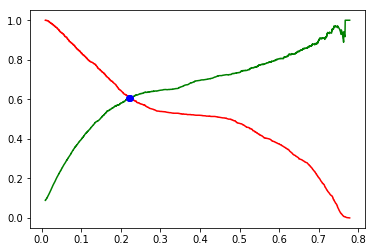

[0.22177932 0.2221419 ] [0.60732394 0.60766629] [0.60766629 0.60766629]


In [322]:
p, r, thresholds = precision_recall_curve(y_train,y_train_pred)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

#checking where precision and recall are changing direction

idx = np.argwhere(np.diff(np.sign(p - r))).flatten()

#Plotting the point of intersection of precision and recall

plt.plot(thresholds[idx], p[idx], 'bo')

plt.show()

#Printing the value of the threshold for which precision and recall are intersecting

print(thresholds[idx],p[idx],r[idx])

# 0.22 seems to be the ideal cut-off

In [323]:
best_rf_model_train_res = y_train.to_frame()
best_rf_model_train_res['pred_churn']=y_train_pred
best_rf_model_train_res['0.22_predicted'] = best_rf_model_train_res.pred_churn.map(lambda x: 1 if x > 0.22 else 0)
pd.crosstab(best_rf_model_train_res['Churn'],best_rf_model_train_res['0.22_predicted'])

# 0.34 as cut-off results in the following metrics
# accuracy - 19593 / 20985 = 93.4%
# sensitivity - 1083 / 1774 = 61%
# specificity - 18510 / 19211 = 96%

# let us now check the test result metrics with the same cut-off

0.22_predicted,0,1
Churn,,
0,18510,701
1,691,1083


In [326]:
# make predictions for test data
# first, we use predict_proba since we need probabilities to compute auc
y_test_pred = rf.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred)
auc

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9211070998074523

In [328]:
best_rf_model_test_res = y_test.to_frame()
best_rf_model_test_res['pred_churn']=y_test_pred
best_rf_model_test_res['0.22_predicted'] = best_rf_model_test_res.pred_churn.map(lambda x: 1 if x > 0.22 else 0)
pd.crosstab(best_rf_model_test_res['Churn'],best_rf_model_test_res['0.22_predicted'])

# 0.34 as cut-off results in the following metrics
# accuracy - 8340 / 8994 = 93%
# sensitivity - 479 / 815 = 58%
# specificity - 7861 / 8179 = 96%

# this is by far the highest value of sensitivity we have been able to achieve so far
# Let us now look at the important features that have helped us build this model

0.22_predicted,0,1
Churn,,
0,7861,318
1,336,479


In [329]:
grid_search.best_estimator_.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.82780639e-04, 3.01579119e-03, 4.22742585e-02, 5.51855324e-04,
       5.26336733e-04, 1.00698369e-02, 5.10335878e-04, 3.51871078e-04,
       2.23167911e-02, 2.59270617e-04, 3.29417229e-03, 1.03279169e-02,
       5.28167625e-04, 2.04611209e-03, 9.41044528e-03, 2.54982386e-04,
       1.04424875e-04, 1.79987649e-02, 6.85256771e-04, 7.63311885e-04,
       1.90388331e-02, 1.25854220e-04, 4.22157954e-04, 2.39249174e-03,
       1.55821419e-05, 5.56119083e-05, 1.03241709e-05, 2.45004822e-04,
       1.24455588e-04, 4.53009879e-02, 6.53511947e-04, 7.98223608e-04,
       3.95213058e-03, 3.37558092e-04, 4.68064954e-04, 4.33559894e-03,
       3.07482091e-06, 9.89688753e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.59753492e-04, 1.41515236e-03,
       5.84130228e-03, 3.63533109e-05, 1.06069613e-04, 4.71759266e-05,
       1.07918491e-04, 1.75458789e-04, 9.10583210e-04, 9.60118837e-05,
      

In [330]:
feature_importances = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances=feature_importances.sort_values(by='importance',ascending=False)
feature_importances['CUMSUM_imp'] = feature_importances['importance'].cumsum()
feature_importances.head(15)

,importance,CUMSUM_imp
total_t2m_mou_8,0.077461,0.077461
total_ic_mou_8,0.058054,0.135514
loc_ic_t2m_mou_8,0.057506,0.193020
t2m_share_8,0.049889,0.242909
total_og_mou_8,0.045761,0.288671
loc_og_mou_8,0.045301,0.333972
arpu_8,0.042274,0.376246
total_ic_og_mou_8,0.039246,0.415492
total_ic_t2m_mou_8,0.034284,0.449776
total_og_t2m_mou_8,0.033388,0.483163


In [331]:
# Let us compare both values of importance  - XGB and Random Forest
# step 1 - bringing both together into one dataframe
feature_imp_compare_df=imp_features
feature_imp_compare_df['RF_imp']=feature_importances['importance']
feature_imp_compare_df['RF_imp_cumsum']=feature_importances['CUMSUM_imp']
feature_imp_compare_df.head()

,0,CUMSUM_0,RF_imp,RF_imp_cumsum
total_t2m_mou_8,0.176490,0.176490,0.077461,0.077461
total_ic_mou_8,0.085516,0.262007,0.058054,0.135514
loc_ic_t2m_mou_8,0.079503,0.341510,0.057506,0.193020
loc_ic_mou_8,0.040429,0.381939,0.028190,0.634035
total_ic_t2m_mou_8,0.035359,0.417298,0.034284,0.449776


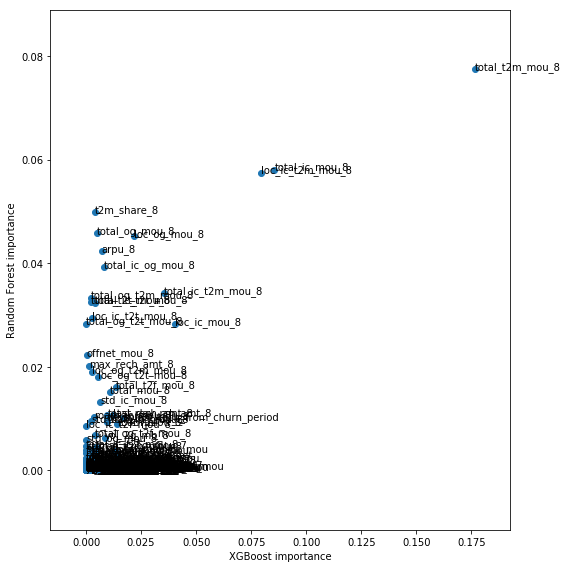

In [332]:
# step 2 plotting the graph
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(feature_imp_compare_df[0], feature_imp_compare_df['RF_imp'])
plt.xlabel('XGBoost importance')
plt.ylabel('Random Forest importance')
for i, txt in enumerate(feature_imp_compare_df.index):
    plt.annotate(txt, (feature_imp_compare_df[0][i],feature_imp_compare_df['RF_imp'][i]))
plt.tight_layout()
plt.show()

# some insights from this comparison are
# for both models, the usage in action phase is critical in determining churn
# In both models, many parameters describing usage with other operators is important in determining churn

In [333]:
# Let us compute the average feature importance dictated by both XGBoost and Random forest models
# our objective is to arrive at the mean importance
feature_imp_compare_df['mean_imp']=(feature_imp_compare_df[0]+feature_imp_compare_df['RF_imp'])/2
feature_imp_compare_df.sort_values(by='mean_imp',ascending=False).head(15)

,0,CUMSUM_0,RF_imp,RF_imp_cumsum,mean_imp
total_t2m_mou_8,0.176490,0.176490,0.077461,0.077461,0.126975
total_ic_mou_8,0.085516,0.262007,0.058054,0.135514,0.071785
loc_ic_t2m_mou_8,0.079503,0.341510,0.057506,0.193020,0.068504
total_ic_t2m_mou_8,0.035359,0.417298,0.034284,0.449776,0.034822
loc_ic_mou_8,0.040429,0.381939,0.028190,0.634035,0.034309
loc_og_mou_8,0.021857,0.439155,0.045301,0.333972,0.033579
t2m_share_8,0.004162,0.793473,0.049889,0.242909,0.027025
total_og_mou_8,0.004794,0.748476,0.045761,0.288671,0.025278
arpu_8,0.007152,0.690648,0.042274,0.376246,0.024713
total_ic_og_mou_8,0.007937,0.660471,0.039246,0.415492,0.023591


#### Of the 15 features, 10 are totals derived from existing features
#### Of the remaining 5, 3 are local incoming usages, 1 is local outgoing usage and 1 is arpu
#### across the features, incoming is more important than outgoing  - 8 incoming usage features and 4 outgoing
#### t2m usage is also important, with 5 features desrcibing different t2m usages